In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime


In [86]:
df = pd.read_csv(r'C:\Users\karthik\Downloads\day.csv')


In [87]:

df = pd.get_dummies(df,columns=['season','weathersit'],drop_first=True)  


df.drop('dteday',axis=1,inplace=True)
df.drop('instant',axis=1,inplace=True)
df.drop('holiday',axis=1,inplace=True)

In [88]:
for i in df.columns:
    df[i].fillna(value = df[i].median())

RMLSE for registered: 0.14238799060563823


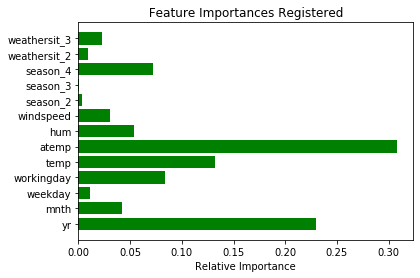

RMLSE for casual: 0.3035771611552824


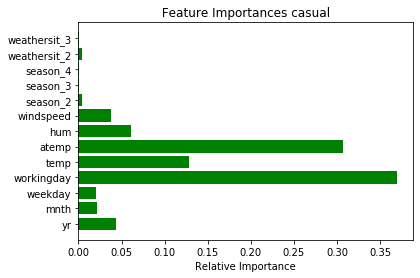

RMLSE for the whole data: 0.15102547005593392


In [89]:

# Model for registered
x = df.drop(['casual','registered','cnt'],axis = 1)
y = df.registered

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

from sklearn.ensemble import RandomForestRegressor



rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}
from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(x_train,y_train)

a = gs_rf.best_params_


RF = RandomForestRegressor(n_estimators=a['n_estimators'],max_depth=a['max_depth'],min_samples_leaf=a['min_samples_leaf'],random_state=0)

model_1 = RF.fit(x,y)
reg_pred = model_1.predict(x)
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(reg_pred,y)
rmsle=np.sqrt(msle)
print('RMLSE for registered:',rmsle) 
importances = RF.feature_importances_
plt.title(' Feature Importances Registered ')
plt.barh(range(len(importances)), importances, color='g', align='center')
plt.yticks(range(len(importances)), x.columns)
plt.xlabel('Relative Importance')
plt.show()


# Model for casual
x = df.drop(['casual','registered','cnt'],axis = 1)
y = df.casual

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

from sklearn.ensemble import RandomForestRegressor



rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}
from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(x_train,y_train)

a = gs_rf.best_params_


RF = RandomForestRegressor(n_estimators=a['n_estimators'],max_depth=a['max_depth'],min_samples_leaf=a['min_samples_leaf'],random_state=0)

model_1 = RF.fit(x,y)
casual_pred = model_1.predict(x)
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(casual_pred,y)
rmsle=np.sqrt(msle)
print('RMLSE for casual:',rmsle) 
importances = RF.feature_importances_
plt.title(' Feature Importances casual ')
plt.barh(range(len(importances)), importances, color='g', align='center')
plt.yticks(range(len(importances)), x.columns)
plt.xlabel('Relative Importance')
plt.show()

total_pred=reg_pred+casual_pred
pred=pd.DataFrame()
pred['pred']=total_pred
pred.sort_index(inplace = True)

from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(df['cnt'],total_pred)
rmsle=np.sqrt(msle)
print('RMLSE for the whole data:',rmsle)